In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

###Reading the data from all csv files and storing all them into one dataframe

In [ ]:
files=os.listdir("/content/drive/MyDrive/Colab Notebooks/Sales Analysis /sales_data")
comp_df=pd.DataFrame()
for i in files:
    comp_df=pd.concat([comp_df,pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sales Analysis /sales_data/"+i)])

In [ ]:
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [ ]:
comp_df["Price Each"]=pd.to_numeric(comp_df["Price Each"],errors="coerce")
comp_df["Quantity Ordered"]=pd.to_numeric(comp_df["Quantity Ordered"],errors="coerce")

In [ ]:
 comp_df["Order Date"].replace("Order Date",np.nan,inplace=True);
 comp_df["Product"].replace("Product",np.nan,inplace=True);

In [ ]:
comp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2.0,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1.0,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1.0,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2.0,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2.0,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [ ]:
comp_df["Month"]=comp_df["Order Date"].str.slice(0,2)
comp_df["Month"]=pd.to_numeric(comp_df["Month"],errors="coerce");
comp_df["Month"]

0        8.0
1        8.0
2        8.0
3        8.0
4        8.0
        ... 
18378    4.0
18379    4.0
18380    4.0
18381    4.0
18382    4.0
Name: Month, Length: 186850, dtype: float64

In [ ]:
comp_df["Time"]=comp_df["Order Date"].str.slice(9,14)
comp_df["Time"]

0        22:21
1        15:11
2        14:40
3        20:59
4        19:53
         ...  
18378    17:11
18379    16:02
18380    14:36
18381    15:09
18382    11:08
Name: Time, Length: 186850, dtype: object

In [ ]:
comp_df["Total Revenue"]=comp_df["Quantity Ordered"]*comp_df["Price Each"]
comp_df["Total Revenue"].describe()

count    185950.000000
mean        185.490917
std         332.919771
min           2.990000
25%          11.950000
50%          14.950000
75%         150.000000
max        3400.000000
Name: Total Revenue, dtype: float64

###What is the most sold product?

In [ ]:
def do(x):
   try:
      return x[1].strip(" ")
   except:
      return np.nan
comp_df["City"]=comp_df["Purchase Address"].str.split(",").apply(lambda x:do(x))

<ipython-input-95-cda8bbcf44eb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_count_df,y=product_count_df.index,palette=colors);


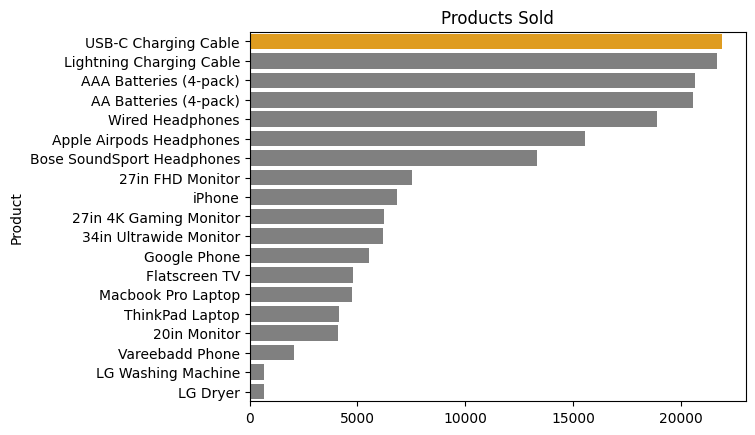

In [95]:
product_count_df=comp_df["Product"].value_counts();
colors=['grey' if x<max(product_count_df) else 'orange' for x in product_count_df];
sns.set_palette("pastel",10);
sns.barplot(x=product_count_df,y=product_count_df.index,palette=colors);
plt.title("Products Sold");
plt.ylabel("Product");
plt.xlabel("")
plt.show();

From the graph it is clear that USB Type-C charge is the most saled product followed by lightning charging cable

### Which month generates the highest revenue?

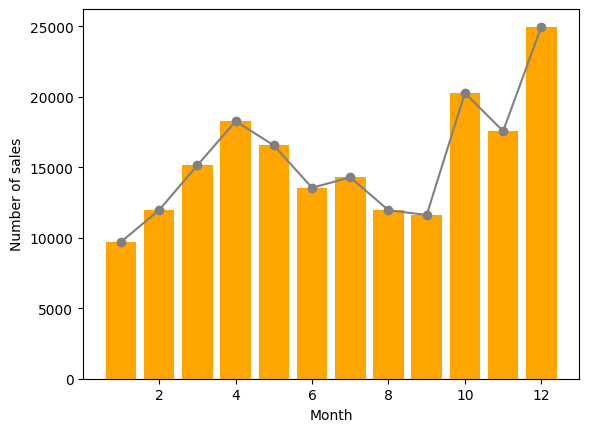

In [104]:
month_data_df=comp_df.Month.value_counts()
plt.bar(month_data_df.index,month_data_df,color="orange");
plt.plot(month_data_df.sort_index(),marker="o",color="grey");
plt.xlabel("Month");
plt.ylabel("Number of sales");

From the graph it is clear that the number of sales increases gradually but start decreasing from the month of May to September.
Decemeber is the month with the highest sale.

#At what time we have highest sales?

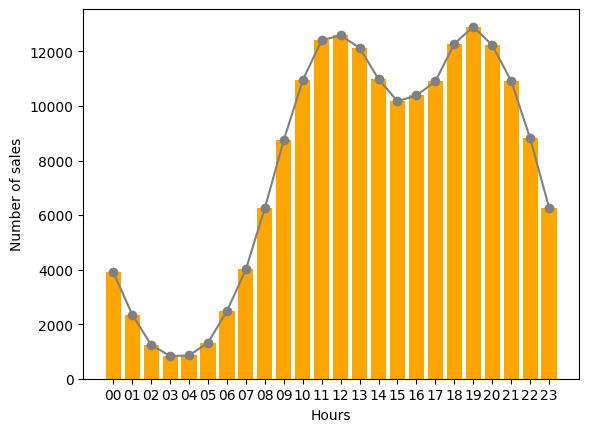

In [105]:

hour_data_df=comp_df["Time"].str.slice(0,2).value_counts().sort_index();
plt.bar(hour_data_df.index,hour_data_df,color="orange");
plt.plot(hour_data_df,marker="o",color="grey");
plt.xlabel("Hours");
plt.ylabel("Number of sales");

From the graph it is very clear that most of the sales are done during noon(11am-1pm) and evening time(6pm-8pm).

#Which month generates more revenue?

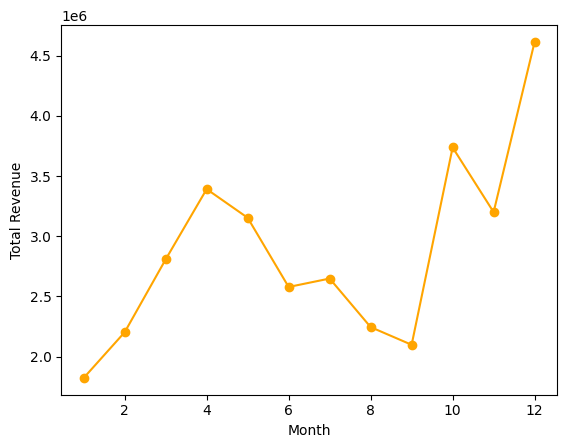

In [ ]:
df=comp_df.groupby("Month")["Total Revenue"].sum()
plt.plot(df,marker="o",color="orange");
plt.xlabel("Month");
plt.ylabel("Total Revenue");

Here it is very clear that overall trend of revenue increase throughout the year but there is also a decrease in revenue starting from May to September.
December generates highest revenue.

#Which city generates highest revenue?

<ipython-input-60-53aedb7969c6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_revenue_df,y=city_revenue_df.index,palette=colors);


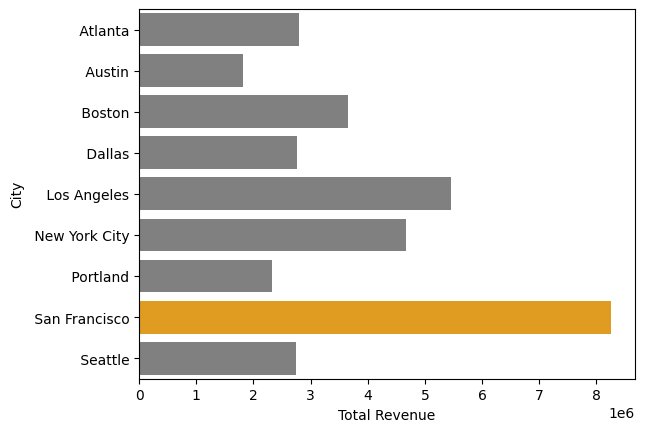

In [ ]:
city_data_df=comp_df.groupby("City");
city_revenue_df=city_data_df["Total Revenue"].sum();
colors=['grey' if x<max(city_revenue_df) else 'orange' for x in city_revenue_df];
sns.barplot(x=city_revenue_df,y=city_revenue_df.index,palette=colors);

From this graph we can see that Sam Francisco is the city with highest revenue followed by Los Angeles

# Which product is highest revenue generator?

<ipython-input-14-427845b50a06>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df,y=df.index,palette=colors);


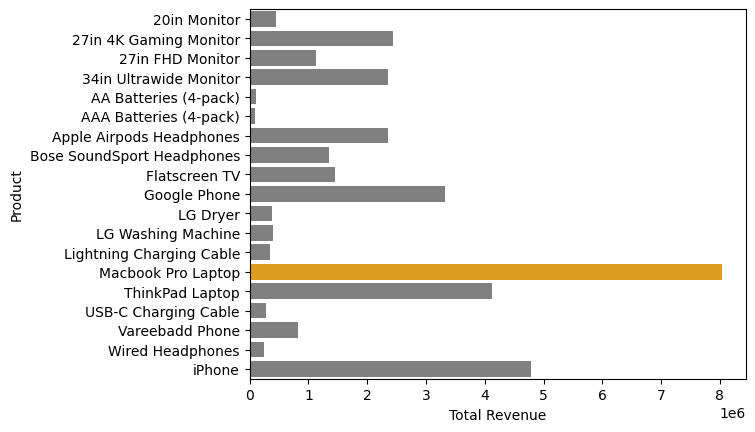

In [ ]:
df=comp_df.groupby("Product")["Total Revenue"].sum();
colors=['grey' if x<max(df) else 'orange' for x in df];
sns.barplot(x=df,y=df.index,palette=colors);

From this graph we can seen that MacBook Pro Laptop generates the highest revenue.

#Which Product in San Francisco generates highest revenue?

<ipython-input-94-e9989e116f03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df,y=df.index,palette=colors);


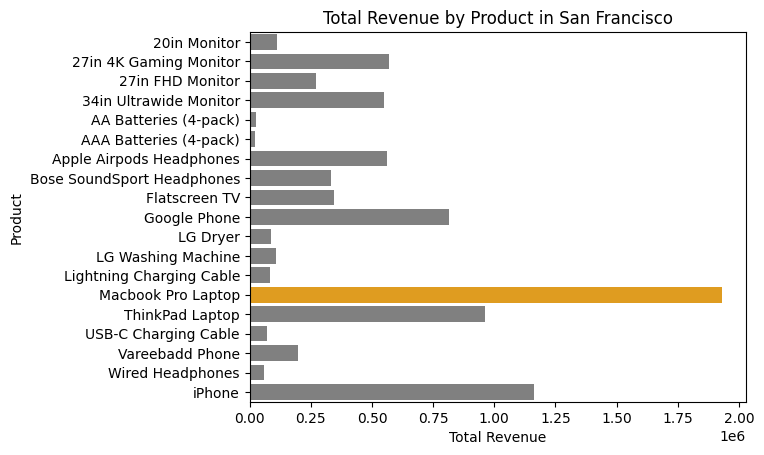

In [ ]:
df=comp_df[comp_df.City== "San Francisco"].groupby("Product")["Total Revenue"].sum();
colors=['grey' if x<max(df) else 'orange' for x in df]
sns.barplot(x=df,y=df.index,palette=colors);
plt.title("Total Revenue by Product in San Francisco");

From this graph we can seen that MacBook Pro Laptop generates the highest revenue also in Sam Francisco.